<div style="text-align: right"> Provided on May 20, Due on June 03 [BRI516, Spring/2020] </div>

For homework in general:
* Install `Anaconda` and create an environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn`,`scipy` in Python 3.5
* Please type the equation and/or text using markdown in jupyter-lab or jupyter-notebook
* Please upload your jupyter-notebook file for homework to `Blackboard` 
* Please discuss your results at least one line of text


## [Hw#3] Regression analysis

The dataset (X) provided has a very high-dimensional sample (i.e., number of dimension = 60,837) while there is a limited available number of samples (n = 80). 

The goal is to predict the target scores (y) from the high-dimensional input, X.
* Note that, as you know, this problem is very prone to the so-called, curse-of-dimensionality.
    * Thus, you would need to put some effort to optimize your model such as using regularizations

 
    

----

### Now, please perform the following to solve this regression problem.

* Please try out at least a few models that you learned in the class and show only the results from your best performing regression model



#### 1. Load all the input sample data X and target values y
 (a) You can use 'loadmat' function after importing 'scipy.io' to load 'dataset.mat' 
 
 (b) Please standardize X before using



## Load data and check the shape of it

In [1]:
import scipy.io as sio
import numpy as np
dataset = sio.loadmat("data/dataset.mat")
print(np.shape(dataset['X'].T))
print(np.shape(dataset['y'].T))



(80, 60559)
(80, 1)


## Split train/test and check

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['X'].T, dataset['y'].T, test_size = 0.2)
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test)) 

(64, 60559) (64, 1)
(16, 60559) (16, 1)


#### 2. Perform the regression analysis based on the nested k-fold cross-validation (k=5) 
 
 (a) Please evaluate the performance from the training, validation, and test data by the correlation of true and predicted values 

 (b) Please optimize the potential hyperparameter(s) of your model to get a best performance


## Pipeline for nested k-fold cv

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),('clf', ElasticNet(alpha=0.003))])

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print(pipe_lr.score(X_train, y_train))
print(pipe_lr.score(X_test, y_test))



0.9969281225258522
-0.32293721157367283


## Nested k-fold cv

In [5]:
import numpy as np
NUM_TRIALS = 3
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    print(i)
    param_range= [0.01, 0.03, 0.1, 0.3]
    p_grid = [{},{'clf__alpha': param_range, 'clf__l1_ratio': param_range}]
    inner_cv = KFold(n_splits=2, shuffle=True)
    outer_cv = KFold(n_splits=3, shuffle=True)

    clf = GridSearchCV(estimator=pipe_lr, param_grid=p_grid, scoring='r2', cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv, n_jobs=-1)
    nested_scores[i] = nested_score.mean()
print(nested_scores)


0
1
2
[-0.19238141 -0.32705489 -0.0566172 ]


## Learning  curve

In [19]:
from sklearn.model_selection import learning_curve
clf = GridSearchCV(estimator=pipe_lr, param_grid=p_grid, scoring='r2', cv=inner_cv)
clf.fit(X_train, y_train)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=clf.best_estimator_, X=X_train, y=y_train, train_sizes=np.arange(0.1,1.1,0.1), cv=5, scoring='r2', n_jobs=-1)

    #### Notes:
    * For each of the folds, show learning curves (along epochs) of the cost and correlation from the training and test(or validation) data where applicable
    * Draw plots using matplotlib
    * Please discuss each of your results with at least few lines of text

## Calculate mean and std for plotting

In [20]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

## Plot

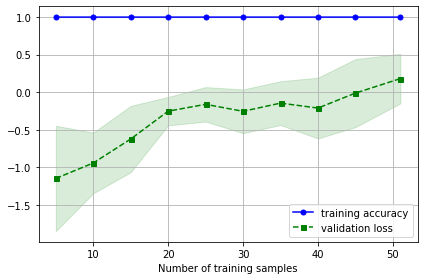

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()